In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,Unnamed: 0,ep,eta,p,phi,pol,pt,qp,tx,ty,zV
0,0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975
1,1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975
2,2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975
3,3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975
4,4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373


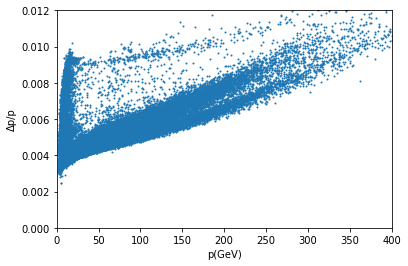

In [4]:
plt.scatter(data['p'], data['ep'],s=1)
plt.xlim(0,400)
plt.ylim(0,0.012)
plt.xlabel("p(GeV)")
plt.ylabel("Δp/p")
plt.show()

In [5]:
#check if NaNs
print(np.sum(np.isnan(data)))
#check data sizes
print(data.shape)

Unnamed: 0    0
ep            0
eta           0
p             0
phi           0
pol           0
pt            0
qp            0
tx            0
ty            0
zV            0
dtype: int64
(208984, 11)


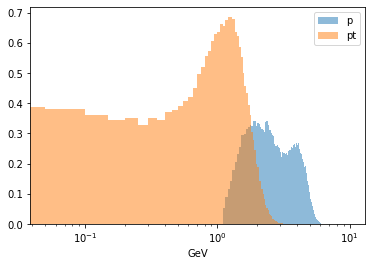

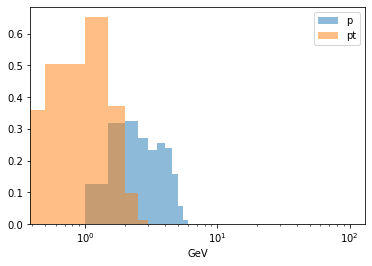

In [69]:
plt.hist(np.log(data['p']),bins=200,alpha=0.5,density=True,range=(0,10),label="p")
plt.hist(np.log(data['pt']),bins=200,alpha=0.5,density=True,range=(0,10),label="pt")
plt.legend()
plt.xscale("log")
# plt.ylim(0,0.3)
plt.xlabel("GeV")
plt.show()
plt.hist(np.log(data['p']),bins=200,alpha=0.5,density=True,range=(0,100),label="p")
plt.hist(np.log(data['pt']),bins=200,alpha=0.5,density=True,range=(0,100),label="pt")
plt.legend()
plt.xscale("log")
plt.xlabel("GeV")
plt.show()

In [7]:
data['pz'] = np.sqrt(np.power(data['p'],2)- np.power(data['pt'],2))
data['epz'] = data['ep']*data['p']/data['pz']
data.head()

,Unnamed: 0,ep,eta,p,phi,pol,pt,qp,tx,ty,zV,pz,epz
0,0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975,71.845851,0.005477
1,1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975,37.627791,0.004052
2,2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975,18.536851,0.003908
3,3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975,8.617790,0.003866
4,4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373,43.242050,0.004989


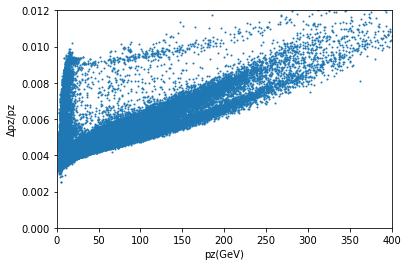

In [8]:
plt.scatter(data['pz'], data['epz'],s=1)
plt.xlim(0,400)
plt.ylim(0,0.012)
plt.xlabel("pz(GeV)")
plt.ylabel("Δpz/pz")
plt.show()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow . keras . layers import Dropout
# num of inputs = 5 (p, tx , ty , eta , phi ), num of outputs = 1 (ep)
num_inputs = 5; num_outputs = 1
# simple Keras model : use same # of nodes as # of inputs , single layer
num_nodes = num_inputs
def simple_model():
# create model
    model = Sequential ()
    # no activation required for the output , as this is a regression problem ,
    # ie. we need a numerical prediction for any input
    model.add( Dense( num_nodes , input_dim = num_inputs , kernel_initializer ='normal', \
    activation ='relu'))
    model.add( Dropout(0.2))
    model.add(Dense( num_outputs , kernel_initializer ='normal'))
    # Compile model
    model.compile(loss ='mean_squared_error', optimizer ='adam')
    return model

In [10]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
N_epochs = 10
batchSize = 1024
# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed( Answer_to_all_questions )
estimator = KerasRegressor( build_fn = simple_model , epochs = N_epochs , batch_size = batchSize )
kfold = KFold( n_splits =10 , random_state = Answer_to_all_questions , shuffle = True )
# data and target are 5- column and 1- column arrays produced with pandas . DataFrame . values
results = cross_val_score( estimator , data[['p','tx','ty','eta','phi']] , data['ep'] , cv = kfold , scoring ='r2')


Train on 188085 samples
Epoch 1/10
188085/188085 [==============================] - 1s 7us/sample - loss: 0.0010A: 16s 
Epoch 2/10
188085/188085 [==============================] - 1s 4us/sample - loss: 2.4254e-06
Epoch 3/10
188085/188085 [==============================] - 1s 4us/sample - loss: 5.3147e-07
Epoch 4/10
188085/188085 [==============================] - 1s 4us/sample - loss: 5.0662e-07
Epoch 5/10
188085/188085 [==============================] - 1s 4us/sample - loss: 5.0583e-07
Epoch 6/10
188085/188085 [==============================] - 1s 4us/sample - loss: 4.8518e-07
Epoch 7/10
188085/188085 [==============================] - 1s 4us/sample - loss: 4.8380e-07
Epoch 8/10
188085/188085 [==============================] - 1s 4us/sample - loss: 4.7972e-07
Epoch 9/10
188085/188085 [==============================] - 1s 4us/sample - loss: 4.8278e-07
Epoch 10/10
188085/188085 [==============================] - 1s 3us/sample - loss: 4.7322e-07
Train on 188085 samples
Epoch 1/10
188085/

In [11]:
print (" Standardised : {} ± {}".format(results.mean(),results.std()))

 Standardised : 0.6379976707698385 ± 0.03653923052480219


In [12]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(( 'mlp', KerasRegressor( build_fn = simple_model , epochs = N_epochs , batch_size = batchSize )))
pipeline = Pipeline( estimators)

In [13]:
def evaluate_model(modelBuilder,N_epochs = 10):
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(( 'mlp', KerasRegressor( build_fn = modelBuilder , epochs = N_epochs , batch_size = batchSize )))
    pipeline = Pipeline( estimators)
    kfold = KFold( n_splits =10 , random_state = Answer_to_all_questions , shuffle = True )
    # data and target are 5- column and 1- column arrays produced with pandas . DataFrame . values
    results = cross_val_score( pipeline , data[['p','tx','ty','eta','phi']] , data['ep'] , cv = kfold , scoring ='r2')
    return(results,pipeline)

In [16]:
results, pipline0 = evaluate_model(simple_model)


Train on 188085 samples
Epoch 1/10
188085/188085 [==============================] - 1s 6us/sample - loss: 2.8872e-06
Epoch 2/10
188085/188085 [==============================] - 1s 4us/sample - loss: 4.9233e-07
Epoch 3/10
188085/188085 [==============================] - 1s 4us/sample - loss: 4.6230e-07
Epoch 4/10
188085/188085 [==============================] - 1s 4us/sample - loss: 4.4780e-07
Epoch 5/10
188085/188085 [==============================] - 1s 4us/sample - loss: 4.2767e-07
Epoch 6/10
188085/188085 [==============================] - 1s 4us/sample - loss: 4.0664e-07
Epoch 7/10
188085/188085 [==============================] - 1s 4us/sample - loss: 3.9719e-07
Epoch 8/10
188085/188085 [==============================] - 1s 4us/sample - loss: 3.9442e-07
Epoch 9/10
188085/188085 [==============================] - 1s 4us/sample - loss: 3.8881e-07
Epoch 10/10
188085/188085 [==============================] - 1s 4us/sample - loss: 3.8559e-07
Train on 188085 samples
Epoch 1/10
188085/188

In [17]:
print (" Standardised : {} ± {}".format(results.mean(),results.std()))

 Standardised : 0.7062129533831872 ± 0.011983853018185522


In [18]:
def denser_model():
# create model
    model = Sequential ()
    # no activation required for the output , as this is a regression problem ,
    # ie. we need a numerical prediction for any input
    model.add( Dense( num_nodes , input_dim = num_inputs , kernel_initializer ='normal', \
    activation ='relu'))
    model.add( Dropout(0.2))
    model.add( Dense(4 , input_dim = num_inputs , kernel_initializer ='normal', \
    activation ='relu'))
    model.add(Dense( num_outputs , kernel_initializer ='normal'))
    # Compile model
    model.compile(loss ='mean_squared_error', optimizer ='adam')
    return model

In [19]:
result1 ,pipeline1 = evaluate_model(denser_model)

Train on 188085 samples
Epoch 1/10
188085/188085 [==============================] - 1s 7us/sample - loss: 1.5570e-06
Epoch 2/10
188085/188085 [==============================] - 1s 4us/sample - loss: 6.0841e-07
Epoch 3/10
188085/188085 [==============================] - 1s 4us/sample - loss: 4.4140e-07
Epoch 4/10
188085/188085 [==============================] - 1s 4us/sample - loss: 3.9921e-07
Epoch 5/10
188085/188085 [==============================] - 1s 4us/sample - loss: 3.8967e-07
Epoch 6/10
188085/188085 [==============================] - 1s 4us/sample - loss: 3.8264e-07 0s - los
Epoch 7/10
188085/188085 [==============================] - 1s 4us/sample - loss: 3.7991e-07
Epoch 8/10
188085/188085 [==============================] - 1s 4us/sample - loss: 3.6847e-07
Epoch 9/10
188085/188085 [==============================] - 1s 4us/sample - loss: 3.6498e-07
Epoch 10/10
188085/188085 [==============================] - 1s 4us/sample - loss: 3.6484e-07
Train on 188085 samples
Epoch 1/10
1

In [21]:
print (" Standardised : {} ± {}".format(result1.mean(),result1.std()))

 Standardised : 0.6953091323066084 ± 0.04630970453600721


In [23]:
def wider_model():
# create model
    model = Sequential ()
    # no activation required for the output , as this is a regression problem ,
    # ie. we need a numerical prediction for any input
    model.add( Dense( num_inputs*2 , input_dim = num_inputs , kernel_initializer ='normal', \
    activation ='relu'))
    model.add( Dropout(0.2))
    model.add(Dense( num_outputs , kernel_initializer ='normal'))
    # Compile model
    model.compile(loss ='mean_squared_error', optimizer ='adam')
    return model

In [24]:
result2 , pipeline2 = evaluate_model(wider_model)

Train on 188085 samples
Epoch 1/10
188085/188085 [==============================] - 1s 6us/sample - loss: 2.0648e-05
Epoch 2/10
188085/188085 [==============================] - 1s 4us/sample - loss: 8.6625e-07
Epoch 3/10
188085/188085 [==============================] - 1s 4us/sample - loss: 5.5900e-07
Epoch 4/10
188085/188085 [==============================] - 1s 4us/sample - loss: 4.7196e-07
Epoch 5/10
188085/188085 [==============================] - 1s 4us/sample - loss: 4.3251e-07
Epoch 6/10
188085/188085 [==============================] - 1s 4us/sample - loss: 4.1087e-07
Epoch 7/10
188085/188085 [==============================] - 1s 4us/sample - loss: 3.9535e-07
Epoch 8/10
188085/188085 [==============================] - 1s 4us/sample - loss: 3.8460e-07
Epoch 9/10
188085/188085 [==============================] - 1s 4us/sample - loss: 3.7500e-07
Epoch 10/10
188085/188085 [==============================] - 1s 4us/sample - loss: 3.6999e-07
Train on 188085 samples
Epoch 1/10
188085/188

In [25]:
print (" Standardised : {} ± {}".format(result2.mean(),result2.std()))

 Standardised : 0.7359146348385874 ± 0.0193347234436975


The wider model gives the best performance!

In [35]:
def evaluate_model_new(modelBuilder,N_epochs = 10):
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(( 'mlp', KerasRegressor( build_fn = modelBuilder , epochs = N_epochs , batch_size = batchSize )))
    pipeline = Pipeline( estimators)
    kfold = KFold( n_splits =10 , random_state = Answer_to_all_questions , shuffle = True )
    # data and target are 5- column and 1- column arrays produced with pandas . DataFrame . values
    results = cross_val_score( pipeline , data[['p','tx','ty','eta','phi']] , data['ep'] , cv = kfold , scoring ='r2')
    return(results,pipeline)

In [77]:
from tensorflow.keras.layers import BatchNormalization
import tensorflow
import keras
def beast_model():
# create model
    model = Sequential()
    # no activation required for the output , as this is a regression problem ,
    # ie. we need a numerical prediction for any input
    model.add( Dense(20 , input_dim = num_inputs , kernel_initializer ='normal', \
    activation ='relu'))
    model.add(Dropout(0.1))
#     model.add(BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001, center=True, scale=True))

    model.add( Dense( 15 , input_dim = num_inputs , kernel_initializer ='normal', activation ='relu'))
#     model.add(Dropout(0.05))
#     model.add( Dense( 10 , input_dim = num_inputs , kernel_initializer ='normal', activation ='relu'))
    model.add(BatchNormalization(axis=-1, momentum=0.9, epsilon=0.001, center=True, scale=True))

    model.add( Dense( 5 , input_dim = num_inputs , kernel_initializer ='normal', activation ='relu'))

    model.add(Dense( num_outputs , kernel_initializer ='normal'))
    # Compile model
    op = tensorflow.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')
#     op = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(loss ='mean_squared_error', optimizer = op)
    return model

In [78]:
results3, pipeline3 = evaluate_model_new(beast_model,N_epochs = 10)

Train on 188085 samples
Epoch 1/10
188085/188085 [==============================] - 5s 24us/sample - loss: 1.3622e-06
Epoch 2/10
188085/188085 [==============================] - 2s 10us/sample - loss: 3.7246e-07
Epoch 3/10
188085/188085 [==============================] - 2s 12us/sample - loss: 3.3628e-07
Epoch 4/10
188085/188085 [==============================] - 2s 13us/sample - loss: 3.1491e-07
Epoch 5/10
188085/188085 [==============================] - 2s 13us/sample - loss: 2.9712e-07
Epoch 6/10
188085/188085 [==============================] - 2s 13us/sample - loss: 2.8963e-07
Epoch 7/10
188085/188085 [==============================] - 6s 33us/sample - loss: 2.7728e-07
Epoch 8/10
188085/188085 [==============================] - 6s 31us/sample - loss: 2.6976e-07
Epoch 9/10
188085/188085 [==============================] - 8s 40us/sample - loss: 2.6364e-07
Epoch 10/10
188085/188085 [==============================] - 1s 8us/sample - loss: 2.6406e-07
Train on 188085 samples
Epoch 1/10
1

188086/188086 [==============================] - 2s 12us/sample - loss: 2.8247e-07
Epoch 6/10
188086/188086 [==============================] - 2s 11us/sample - loss: 2.7446e-07
Epoch 7/10
188086/188086 [==============================] - 2s 10us/sample - loss: 2.7018e-07
Epoch 8/10
188086/188086 [==============================] - 2s 10us/sample - loss: 2.6518e-07
Epoch 9/10
188086/188086 [==============================] - 2s 12us/sample - loss: 2.6032e-07
Epoch 10/10
188086/188086 [==============================] - 5s 29us/sample - loss: 2.5709e-07
Train on 188086 samples
Epoch 1/10
188086/188086 [==============================] - 2s 13us/sample - loss: 8.2223e-07
Epoch 2/10
188086/188086 [==============================] - 3s 15us/sample - loss: 3.1473e-07
Epoch 3/10
188086/188086 [==============================] - 2s 13us/sample - loss: 2.8148e-07
Epoch 4/10
188086/188086 [==============================] - 2s 12us/sample - loss: 2.6968e-07
Epoch 5/10
188086/188086 [====================

In [79]:
print (" Standardised : {} ± {}".format(results3.mean(),results3.std()))

 Standardised : 0.7881938126200941 ± 0.011581673782730197


Train on 188085 samples
Epoch 1/10
188085/188085 [==============================] - 7s 38us/sample - loss: 1.3667e-06
Epoch 2/10
188085/188085 [==============================] - 2s 13us/sample - loss: 4.1427e-07
Epoch 3/10
188085/188085 [==============================] - 6s 33us/sample - loss: 3.4951e-07
Epoch 4/10
188085/188085 [==============================] - 10s 53us/sample - loss: 3.1351e-07
Epoch 5/10
188085/188085 [==============================] - 3s 17us/sample - loss: 2.9368e-07
Epoch 6/10
188085/188085 [==============================] - 4s 21us/sample - loss: 2.8141e-07
Epoch 7/10
188085/188085 [==============================] - 3s 18us/sample - loss: 2.7065e-07
Epoch 8/10
188085/188085 [==============================] - 5s 26us/sample - loss: 2.6516e-07
Epoch 9/10
188085/188085 [==============================] - 4s 20us/sample - loss: 2.5953e-07
Epoch 10/10
188085/188085 [==============================] - 5s 27us/sample - loss: 2.5511e-07
Train on 188085 samples
Epoch 1/10

188086/188086 [==============================] - 11s 57us/sample - loss: 2.8678e-07
Epoch 6/10
188086/188086 [==============================] - 4s 23us/sample - loss: 2.7662e-07
Epoch 7/10
188086/188086 [==============================] - 5s 24us/sample - loss: 2.6896e-07
Epoch 8/10
188086/188086 [==============================] - 3s 17us/sample - loss: 2.6686e-07
Epoch 9/10
188086/188086 [==============================] - 4s 19us/sample - loss: 2.5817e-07
Epoch 10/10
188086/188086 [==============================] - 6s 30us/sample - loss: 2.5482e-07
Train on 188086 samples
Epoch 1/10
188086/188086 [==============================] - 3s 17us/sample - loss: 1.3105e-06
Epoch 2/10
188086/188086 [==============================] - 3s 14us/sample - loss: 3.2699e-07
Epoch 3/10
188086/188086 [==============================] - 5s 28us/sample - loss: 3.0610e-07
Epoch 4/10
188086/188086 [==============================] - 3s 14us/sample - loss: 2.9562e-07
Epoch 5/10
188086/188086 [===================

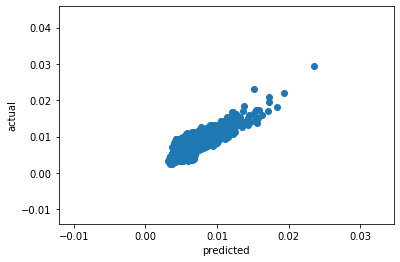

In [80]:
from sklearn.model_selection import cross_val_predict

def plot_pred(pipeline):
    predicted = cross_val_predict(pipeline, data[['p','tx','ty','eta','phi']] , data['ep'] , cv = kfold)
    line = np.arange(-0.01,0.04)
    plt.scatter(predicted,data['ep'])
    plt.plot(line,line)
    return predicted
predicted = plot_pred(pipeline3)    
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

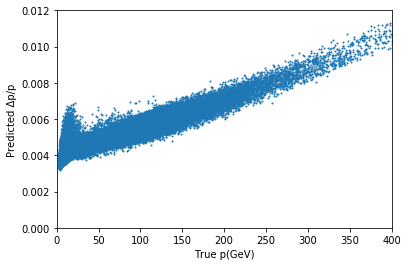

In [81]:
plt.scatter(data['p'], predicted,s=1)
plt.xlim(0,400)
plt.ylim(0,0.012)
plt.xlabel("True p(GeV)")
plt.ylabel("Predicted Δp/p")
plt.show()